# Úkol č. 1 - předzpracování dat a binární klasifikace

  * **Deadline je do 31. října 23:59**, pokud odevzdáte úkol do 7. listopadu 23:59 budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s příznaky, které jsou různých typů.
  * Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru **data.csv** a data na vyhodnocení v souboru **evaluation.csv**.

#### Seznam příznaků:
* survived - zda přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **12 bodů**:
  * Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.
  * V notebooku načtěte data ze souboru **data.csv**. Vhodným způsobem si je rozdělte na podmnožiny vhodné k trénování modelu.
  * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
  * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména. Některé příznaky můžete také úplně zahodit. Pro průzkum dat využívejte vizualizace.
  * Nějakým způsobem se vypořádejte s chybějícími hodnotami.
  * Následně si vyberte vhodný klasifikační model z přednášek. Najděte vhodné hyperparametry a určete jeho přesnost (accuracy) na trénovací množině. Také určete jeho přesnost na testovací množině.
  * Načtěte vyhodnocovací data ze souboru **evaluation.csv**. Napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte **results.csv** soubor, ve kterém tyto predikce uložíte do dvou sloupců: ID, predikce přežití. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
  * Ukázka prvních řádků souboru *results.csv*:
  
```
ID,survived
1000,0
1001,1
...
```

**Další body zadání** za případné další body  (můžete si vybrat, maximum bodů za úkol je každopádně 16 bodů):
  * (až +4 body) Aplikujte všechny klasifikační modely z přednášek a určete (na základě přesnosti na validační množině), který je nejlepší. Přesnost tohoto nejlepšího modelu odhadněte pomocí křížové validace. K predikcím na vyhodnocovacích datech využijte tento model.
  * (až +4 body) Zkuste použít nějaké (alespoň dvě) netriviální metody doplňování chybějících hodnot u věku. Zaměřte na vliv těchto metod na přesnost predikce výsledného modelu. K predikcím na vyhodnocovacích datech využijte ten přístup, který Vám vyjde jako nejlepší.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Vytvořte i csv soubor s predikcemi a uložte ho v rámci projektu (`results.csv`, vedle ipython notebooku).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

## DecisionTreeClassifier

In [1]:
import pandas as pd
import numpy  as np

* Data přečteme a podíváme se, s jakými příznaky vlastně pracujeme

In [2]:
df  = pd.read_csv('data.csv')
print(np.sort(df.columns.values))
df2 = pd.read_csv('evaluation.csv')
print(np.sort(df2.columns.values))

['ID' 'age' 'cabin' 'embarked' 'fare' 'home.dest' 'name' 'parch' 'pclass'
 'sex' 'sibsp' 'survived' 'ticket']
['ID' 'age' 'cabin' 'embarked' 'fare' 'home.dest' 'name' 'parch' 'pclass'
 'sex' 'sibsp' 'ticket']


In [3]:
# příznaky -- vše kromě vysvětlované proměnné
X = df.drop(columns=['survived'])
# survived -- vysvětlovaná proměnná
y = df['survived'] 

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [5]:
# nepodařilo se
# dt.fit(X, y)

* Musí se nějakým způsobem vyřešit **null hodnoty** v datech a také **nečíselné hodnoty**, se kterými (nejen) strom neumí pracovat

In [6]:
display(X)

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,NaN
1,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S,"Australia Fingal, ND"
2,2,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,Belfast
3,3,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
4,4,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,NaN
996,996,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S,"New Forest, England"
997,997,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,NaN
998,998,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN


* Zbavíme se 'nezajímavých' hodnot (např. co name, to unikátní hodnota, což nam k předpovědi nic moc užitečného nepřidá; u ostatních dropnutých columns je to prakticky stejně (chybí příliš mnoho dat/samé unikátní hodnoty/...))

In [7]:
df.drop(columns=['name', 'cabin', 'home.dest', 'ID', 'ticket'], inplace=True)

* Chybící embarked nahradíme nejvyskytovanější hodnotou tohoto příznaku

In [8]:
tmp = df['embarked'].value_counts().idxmax()
df['embarked'].fillna(value=tmp, inplace=True)

In [9]:
display(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,3,male,27.0,0,0,7.7958,S
1,1,3,male,45.0,0,0,8.0500,S
2,0,2,male,NaN,0,0,0.0000,S
3,1,3,female,27.0,0,2,11.1333,S
4,0,1,male,28.0,1,0,82.1708,C
...,...,...,...,...,...,...,...,...
995,1,1,female,22.0,0,0,151.5500,S
996,0,2,male,21.0,0,0,73.5000,S
997,1,1,female,24.0,0,0,69.3000,C
998,0,3,male,NaN,8,2,69.5500,S


* Číselně zakodujeme nečíselné hodnoty, abychom s dataframem mohli nakládat

In [10]:
enc_cols = ['sex', 'embarked']
df[enc_cols] = df[enc_cols].astype('category').apply(lambda x: x.cat.codes)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1000 non-null   int64  
 1   pclass    1000 non-null   int64  
 2   sex       1000 non-null   int8   
 3   age       797 non-null    float64
 4   sibsp     1000 non-null   int64  
 5   parch     1000 non-null   int64  
 6   fare      999 non-null    float64
 7   embarked  1000 non-null   int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 49.0 KB


In [12]:
df.loc[df['fare'].isnull(), 'pclass']

383    3
Name: pclass, dtype: int64

In [13]:
tmp = df.loc[383, 'pclass']
print(tmp)
tmp = df[df['pclass'] == 3]['fare'].median()
df['fare'].fillna(tmp, inplace=True)
df['fare'].value_counts()

3


8.0500     50
7.7500     45
13.0000    41
7.8958     39
26.0000    36
           ..
91.0792     1
8.4042      1
28.5375     1
45.5000     1
4.0125      1
Name: fare, Length: 249, dtype: int64

## Předpověď age

* Tuto hodnotu můžeme buďto naivně nahradit mediánem/aritm. průměrem, a nebo ji zkusit předpovědět. Zkusím tu druhou možnost

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

Xage = df[df['age'].notnull()].drop(['survived', 'age'], axis=1)
yage = df[df['age'].notnull()]['age']

rd_seed = 228
Xage_train, Xage_test, yage_train, yage_test = train_test_split(Xage, yage, test_size=0.25, random_state=rd_seed)
print("původní data")
display(Xage.shape)
display(yage.shape)
print("trénovací data")
display(Xage_train.shape)
display(yage_train.shape)
print("testovací data")
display(Xage_test.shape)
display(yage_test.shape)

Xage_train, Xage_val, yage_train, yage_val = train_test_split(Xage_train, yage_train, test_size=0.25, random_state=rd_seed) 
print('nové trénovací data')
display(Xage_train.shape)
display(yage_train.shape)
print('validační data')
display(Xage_val.shape)
display(yage_val.shape)

původní data


(797, 6)

(797,)

trénovací data


(597, 6)

(597,)

testovací data


(200, 6)

(200,)

nové trénovací data


(447, 6)

(447,)

validační data


(150, 6)

(150,)

In [15]:
dt_age = DecisionTreeRegressor(max_depth=5)
dt_age.fit(Xage_train, yage_train)

DecisionTreeRegressor(max_depth=5)

In [16]:
import sklearn.metrics as metrics

* Odladíme hloubku

In [17]:
val_acc = []
train_acc = []
depths = range(1,101)
for depth in depths:
    dt_age = DecisionTreeRegressor(max_depth=depth)
    dt_age.fit(Xage_train, yage_train)
    train_acc.append(metrics.mean_squared_error(yage_train, dt_age.predict(Xage_train)))
    val_acc.append(metrics.mean_squared_error(yage_val, dt_age.predict(Xage_val)))


In [18]:
optimal_depth = np.argmin(val_acc) + 1
optimal_depth

4

In [19]:
dt_age = DecisionTreeRegressor(max_depth=optimal_depth)
dt_age.fit(Xage_train, yage_train)

DecisionTreeRegressor(max_depth=4)

* Věk si předpovíme tam, kde chybí, na základě existujících příznaků, posléze chybící hodnoty nahradíme za ty předpovězené

In [20]:
tmpX = df[df['age'].isnull()].drop(columns=['age', 'survived'])
tmpy = dt_age.predict(tmpX)

In [21]:
df.loc[df['age'].isnull(), 'age'] = tmpy

In [22]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,3,1,27.000000,0,0,7.7958,2
1,1,3,1,45.000000,0,0,8.0500,2
2,0,2,1,32.000000,0,0,0.0000,2
3,1,3,0,27.000000,0,2,11.1333,2
4,0,1,1,28.000000,1,0,82.1708,0
...,...,...,...,...,...,...,...,...
995,1,1,0,22.000000,0,0,151.5500,2
996,0,2,1,21.000000,0,0,73.5000,2
997,1,1,0,24.000000,0,0,69.3000,0
998,0,3,1,7.363636,8,2,69.5500,2


## Předpověď survived

In [23]:
X = df.drop(columns=['survived'])
y = df['survived']

In [24]:
dt.fit(X, y)

DecisionTreeClassifier()

In [25]:
rd_seed = 228
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=rd_seed)
print("původní data")
display(X.shape)
display(y.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(1000, 7)

(1000,)

trénovací data


(750, 7)

(750,)

testovací data


(250, 7)

(250,)

* Mějme navíc i validační množinu (data se tedy děli do 3 kategorií: trénovací, testovací a validační)

In [26]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=rd_seed) 
print('nové trénovací data')
display(Xtrain.shape)
display(ytrain.shape)
print('validační data')
display(Xval.shape)
display(yval.shape)

nové trénovací data


(562, 7)

(562,)

validační data


(188, 7)

(188,)

In [27]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=5)

In [28]:
ypredicted = dt.predict(Xtrain)

In [29]:
(ytrain - ypredicted).value_counts(normalize=True)

 0    0.855872
 1    0.122776
-1    0.021352
Name: survived, dtype: float64

In [30]:
import sklearn.metrics as metrics
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))

accuracy score (train): 0.855872


In [31]:
import sklearn.metrics as metrics
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (test): 0.772000


* Ladění **max_depth** parametru

In [32]:
val_acc = []
train_acc = []
depths = range(1,101)
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))

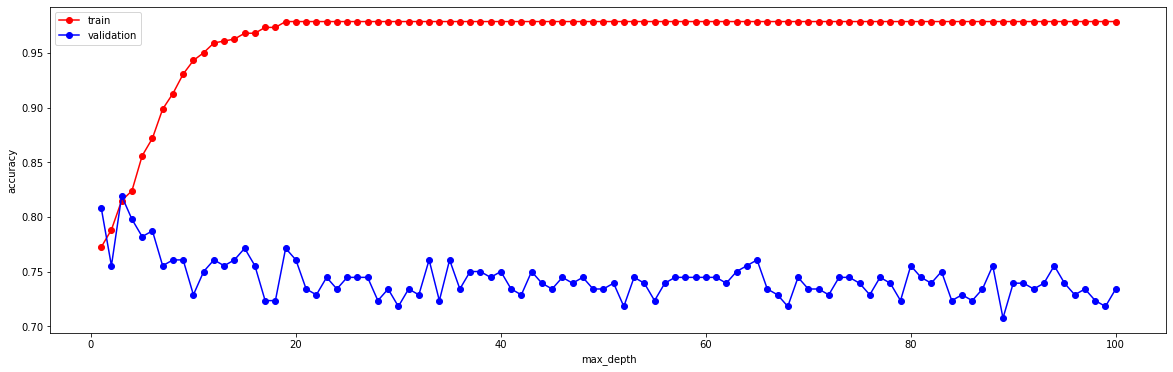

In [33]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.plot(depths, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [34]:
optimal_depth = np.argmax(val_acc) + 1
optimal_depth 

3

In [35]:
print(val_acc)

[0.8085106382978723, 0.7553191489361702, 0.8191489361702128, 0.7978723404255319, 0.7819148936170213, 0.7872340425531915, 0.7553191489361702, 0.7606382978723404, 0.7606382978723404, 0.7287234042553191, 0.75, 0.7606382978723404, 0.7553191489361702, 0.7606382978723404, 0.7712765957446809, 0.7553191489361702, 0.723404255319149, 0.723404255319149, 0.7712765957446809, 0.7606382978723404, 0.7340425531914894, 0.7287234042553191, 0.7446808510638298, 0.7340425531914894, 0.7446808510638298, 0.7446808510638298, 0.7446808510638298, 0.723404255319149, 0.7340425531914894, 0.7180851063829787, 0.7340425531914894, 0.7287234042553191, 0.7606382978723404, 0.723404255319149, 0.7606382978723404, 0.7340425531914894, 0.75, 0.75, 0.7446808510638298, 0.75, 0.7340425531914894, 0.7287234042553191, 0.75, 0.7393617021276596, 0.7340425531914894, 0.7446808510638298, 0.7393617021276596, 0.7446808510638298, 0.7340425531914894, 0.7340425531914894, 0.7393617021276596, 0.7180851063829787, 0.7446808510638298, 0.73936170212

In [36]:
dt = DecisionTreeClassifier(max_depth=optimal_depth)
dt.fit(Xtrain, ytrain)
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (test): 0.788000


In [37]:
from sklearn.model_selection import ParameterGrid
param_grid = {
    'max_depth': range(1,31), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)

In [38]:
val_acc = []
train_acc = []
test_acc = []
for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))
    test_acc.append(metrics.accuracy_score(ytest, dt.predict(Xtest)))


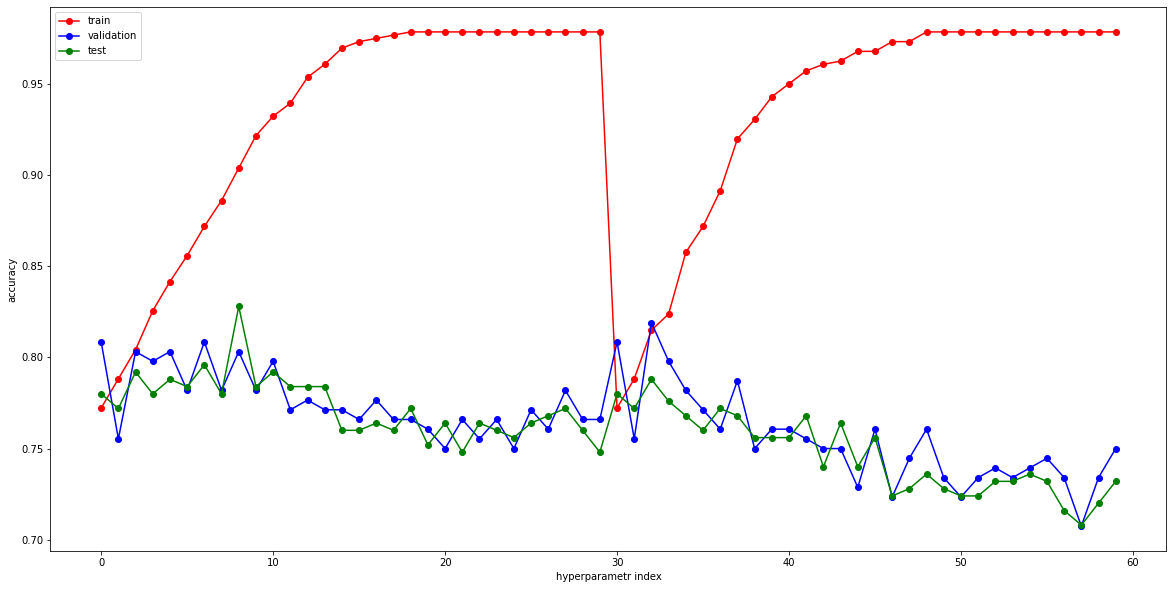

In [39]:
plt.figure(figsize=(20,10))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.plot(test_acc,'og-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation', 'test'])
plt.show()

* Našli jsme nejlepší parametry, na kterých teď náš model naučíme předpovídat

In [40]:
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
print("Max accuracies:")
print(train_acc[np.argmax(train_acc)])
print(val_acc[np.argmax(val_acc)])
print(test_acc[np.argmax(test_acc)])

{'max_depth': 3, 'criterion': 'gini'}
Max accuracies:
0.9786476868327402
0.8191489361702128
0.828


In [41]:
dt = DecisionTreeClassifier(**best_params) 
dt.fit(Xtrain, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, dt.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (train): 0.814947
accuracy score (validation): 0.819149
accuracy score (test): 0.788000


* Přečteme a případně předzpracujeme dataframe na bázi evaluation.csv

In [42]:
df2 = pd.read_csv('evaluation.csv')

In [43]:
df2.isnull().sum()

ID             0
pclass         0
name           0
sex            0
age           60
sibsp          0
parch          0
ticket         0
fare           0
cabin        236
embarked       1
home.dest    137
dtype: int64

In [44]:
print(df.columns.values)
print(df2.columns.values)
cols_to_drop = np.setdiff1d(df2.columns.values, df.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked']
['ID' 'pclass' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare' 'cabin'
 'embarked' 'home.dest']


* Zbavíme se u df2 těch příznaků, které jsme pro učení našeho modelu nepoužívali a tudíž je nemůžeme použít i pro předpověď 

In [45]:
df2.drop(columns=cols_to_drop, inplace=True)

* Chybící hodnotu v embarked nahradíme za 'S', jelikož je to nejčastější hodnota v tomto sloupci + strašně malý počet dat chybí, tedy přidání hodnoty, která se vyskytuje nejčastěji, nám nijak neuškodí
* Chybící věk naivně nahradíme aritemtickým průměrem

In [46]:
df2.isnull().sum()
df2['embarked'].fillna('S', inplace=True)

* Číselně zakodujeme nečíselné hodnoty, abychom s dataframem mohli nakládat

In [47]:
obj_cols = df2.select_dtypes(['object']).columns
print(obj_cols)
df2[obj_cols] = df2[obj_cols].astype('category').apply(lambda x: x.cat.codes)

Index(['sex', 'embarked'], dtype='object')


* Chybící věk nahradíme pomocí předpovědí již natrénovaného modelu

In [48]:
tmpX = df2[df2['age'].isnull()].drop(columns=['age'])
tmpy = dt_age.predict(tmpX)
df2.loc[df2['age'].isnull(), 'age'] = tmpy

In [49]:
df2.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [50]:
dt.predict(df2)

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [51]:
df_res = pd.DataFrame(data=dt.predict(df2), columns=['survived'])

In [52]:
df_res

,survived
0,1
1,1
2,1
3,0
4,0
...,...
304,1
305,0
306,0
307,0


In [53]:
# from sklearn.tree import plot_tree

# plt.figure(figsize=(16,10))
# plot_tree(dt, filled=True, feature_names=df2.columns, class_names=True, rounded=True)

In [54]:
df_res['ID'] = 1000
for i in range(len(df_res)):
    df_res.iloc[i, 1] += i 

In [55]:
df_res = df_res.reindex(columns=['ID', 'survived'])

In [56]:
df_res.set_index('ID', inplace=True)

In [57]:
df_res.to_csv('results.csv')

* Tady končí standardní úroveň zadání a následuje použití dalších dvou metod **(randomforest, adaboost)** + nasazení **CV (cross validation)**

## RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(
    n_estimators = 100,
    criterion='gini',
    max_depth=None,
    min_samples_leaf=1,
    max_features='auto'
)

In [60]:
param_grid = {
    'n_estimators': range(1,100,5),
    'max_depth': range(1,5)
}

param_comb = ParameterGrid(param_grid)

val_acc = []
train_acc = []
test_acc = []
for params in param_comb:
    dt = RandomForestClassifier(**params).fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))
    test_acc.append(metrics.accuracy_score(ytest, dt.predict(Xtest)))


In [61]:
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
print("Max accuracies:")
print(train_acc[np.argmax(train_acc)])
print(val_acc[np.argmax(val_acc)])
print(test_acc[np.argmax(test_acc)])

{'n_estimators': 26, 'max_depth': 3}
Max accuracies:
0.8451957295373665
0.8191489361702128
0.812


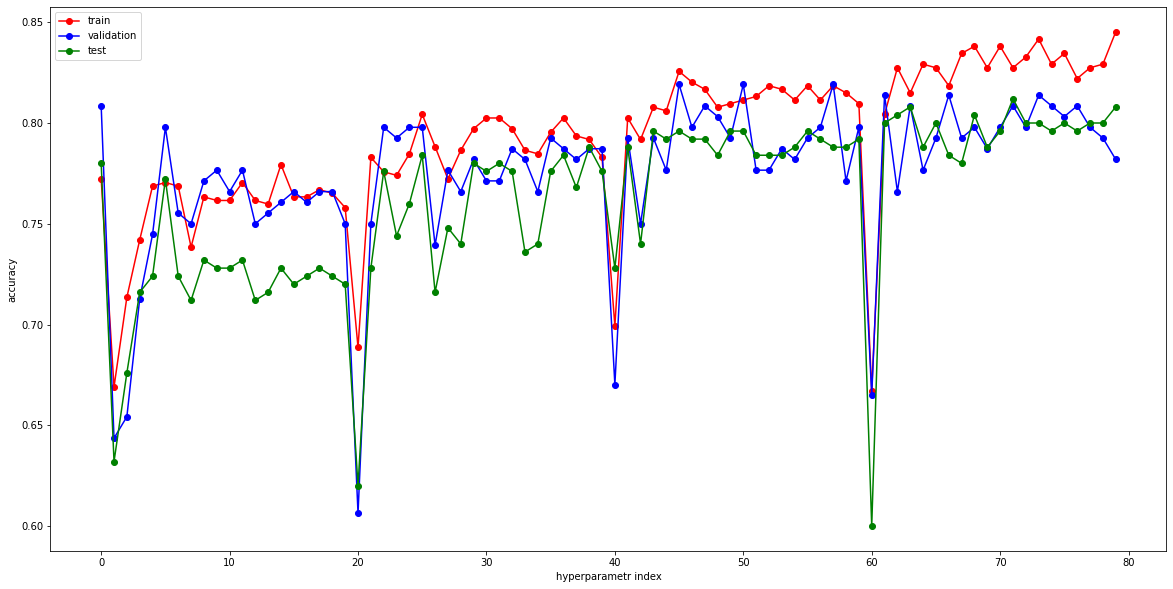

In [62]:
plt.figure(figsize=(20,10))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.plot(test_acc,'og-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation', 'test'])
plt.show()

In [63]:
dt = RandomForestClassifier(**best_params) 
dt.fit(Xtrain, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, dt.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (train): 0.807829
accuracy score (validation): 0.797872
accuracy score (test): 0.792000


## AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'n_estimators': range(1,100,3),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}

param_comb = ParameterGrid(param_grid)

val_acc = []
train_acc = []
test_acc = []
for params in param_comb:
    dt = AdaBoostClassifier(**params).fit(Xtrain.values, ytrain.values)
    train_acc.append(metrics.accuracy_score(ytrain.values, dt.predict(Xtrain.values)))
    val_acc.append(metrics.accuracy_score(yval.values, dt.predict(Xval.values)))
    test_acc.append(metrics.accuracy_score(ytest.values, dt.predict(Xtest.values)))


In [65]:
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
print(train_acc[np.argmax(train_acc)])
print(val_acc[np.argmax(val_acc)])
print(test_acc[np.argmax(test_acc)])

{'n_estimators': 91, 'learning_rate': 0.3}
0.8291814946619217
0.8297872340425532
0.796


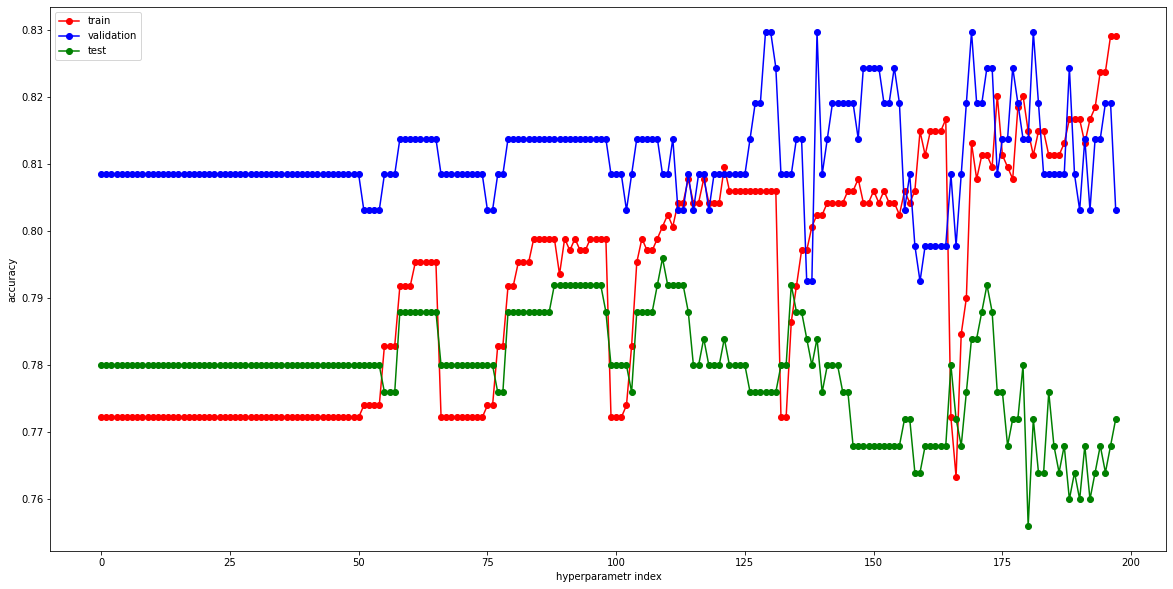

In [66]:
plt.figure(figsize=(20,10))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.plot(test_acc, 'og-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation', 'test'])
plt.show()

In [67]:
dt = AdaBoostClassifier(**best_params) 
dt.fit(Xtrain.values, ytrain.values)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain.values, dt.predict(Xtrain.values))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval.values, dt.predict(Xval.values))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest.values, dt.predict(Xtest.values))))

accuracy score (train): 0.806050
accuracy score (validation): 0.829787
accuracy score (test): 0.776000


# Cross Validation

In [68]:
from sklearn.model_selection import KFold 
num_of_folds = 5

* Předpřipravím si jednotlivé dictionaries s parametry, které pak budu nasazovat na modely

In [69]:
param_gridTree = {
    'max_depth': range(1,31), 
    'criterion': ['entropy', 'gini']
}
param_gridTree_comb = ParameterGrid(param_gridTree)

param_gridForest = {
    'n_estimators': range(1,100,5),
    'max_depth': range(1,5)
}
param_gridForest_comb = ParameterGrid(param_gridForest)

param_gridAda = {
    'n_estimators': range(1,100,5),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}
param_gridAda_comb = ParameterGrid(param_gridAda)

* S dovolením si zapůjčím kod z 5. cvičení a poupravím si jej dle svých potřeb

# <font color='green'>- - - - - - - - - - - -</font>
# <font color='brown'>CV - *STROM*</font>

In [70]:
# accTree v sobě ukládá aritmetické průměry jednotlivých 
# množin, jež mají za své prvky predikce jednotlivých stromů
# každý ze kterých běží s jinými hyperparametry (respektive s 
# jinou kombinací předepsaných hyperparametrů) 

accTree = []
for params in param_gridTree_comb:
    # print('Combination', len(accTree) + 1, '/', len(param_gridTree_comb))
    # comb_accTree v sobě ukládá úspěnosti predikcí
    # přes jednotlivé folds, což nám na konec dá 
    # lepší přehled o tom, jak dobrý ten model je
    comb_accTree = []

    for train, val in KFold(n_splits=num_of_folds).split(df.index):
        # print('Fold', len(comb_accTree) + 1, '/', num_of_folds)
        
        Xtrain = df[df.index.isin(train)].drop(columns=['survived'])
        ytrain = df[df.index.isin(train)]['survived']
        Xval = df[df.index.isin(val)].drop(columns=['survived'])
        yval = df[df.index.isin(val)]['survived']
        
        modelTree = DecisionTreeClassifier(**params)
        modelTree.fit(Xtrain.values, ytrain.values)
        # v rámci jednotlivých běhu si ukládáme 
        # úspěšnosti předpovědi na jednotlivých folds
        comb_accTree.append(metrics.accuracy_score(yval.values, modelTree.predict(Xval.values)))
    # uložíme si aritmetický průměr množiny
    # úspěšnosti předpovědí aktuálního modelu 
    accTree.append(np.mean(comb_accTree))

In [71]:
# Vypíšeme si nejlepší parametry a nejvyšší dosaženou přesnost 
best_indexTree = np.argmax(accTree)
best_paramsTree = param_gridTree_comb[best_indexTree]
best_accTree = accTree[best_indexTree]

print('Best params:', best_paramsTree)
print('Best accuracy: ', best_accTree)

Best params: {'max_depth': 5, 'criterion': 'entropy'}
Best accuracy:  0.807


* Nyní model naučíme na nejlepších parametrech a podíváme se na přesnost

In [72]:
dmodelTreet = DecisionTreeClassifier(**best_paramsTree) 
modelTree.fit(Xtrain.values, ytrain.values)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain.values, modelTree.predict(Xtrain.values))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval.values, modelTree.predict(Xval.values))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest.values, modelTree.predict(Xtest.values))))

accuracy score (train): 0.972500
accuracy score (validation): 0.745000
accuracy score (test): 0.932000


# <font color='brown'>- - - - - - - - - - - -</font>
# <font color='green'>CV - *LES*</font>

* Tady si s prominutím již odpustím komentáře ke kodu, který je prakticky identický s kodem výše

In [73]:
accForest = []
for params in param_gridForest_comb:
    # print('Combination', len(accForest) + 1, '/', len(param_gridForest_comb))
    
    comb_accForest = []

    for train, val in KFold(n_splits=num_of_folds).split(df.index):
        # print('Fold', len(comb_accForest) + 1, '/', num_of_folds)
        
        Xtrain = df[df.index.isin(train)].drop(columns=['survived'])
        ytrain = df[df.index.isin(train)]['survived']
        Xval = df[df.index.isin(val)].drop(columns=['survived'])
        yval = df[df.index.isin(val)]['survived']
        
        modelForest = RandomForestClassifier(**params)
        modelForest.fit(Xtrain.values, ytrain.values)
        comb_accForest.append(metrics.accuracy_score(yval.values, modelForest.predict(Xval.values)))

    accForest.append(np.mean(comb_accForest))

In [74]:
# Vypíšeme si nejlepší parametry a nejvyšší dosaženou přesnost 
best_indexForest = np.argmax(accForest)
best_paramsForest = param_gridForest_comb[best_indexForest]
best_accForest = accForest[best_indexForest]

print('Best params:', best_paramsForest)
print('Best accuracy: ', best_accForest)

Best params: {'n_estimators': 66, 'max_depth': 4}
Best accuracy:  0.807


* Nyní model naučíme na nejlepších parametrech a podíváme se na přesnost

In [75]:
modelForest = RandomForestClassifier(**best_paramsForest) 
modelForest.fit(Xtrain.values, ytrain.values)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain.values, modelForest.predict(Xtrain.values))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval.values, modelForest.predict(Xval.values))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest.values, modelForest.predict(Xtest.values))))

accuracy score (train): 0.815000
accuracy score (validation): 0.840000
accuracy score (test): 0.824000


# <font color='blue'>- - - - - - - - - - - -</font>
# <font color='red'>CV - *ADABOOST*</font>

In [76]:
accAda = []
for params in param_gridAda_comb:
    # print('Combination', len(accAda) + 1, '/', len(param_gridAda_comb))
    
    comb_accAda = []

    for train, val in KFold(n_splits=num_of_folds).split(df.index):
        # print('Fold', len(comb_accAda) + 1, '/', num_of_folds)
        
        Xtrain = df[df.index.isin(train)].drop(columns=['survived'])
        ytrain = df[df.index.isin(train)]['survived']
        Xval = df[df.index.isin(val)].drop(columns=['survived'])
        yval = df[df.index.isin(val)]['survived']
        
        modelAda = AdaBoostClassifier(**params)
        modelAda.fit(Xtrain.values, ytrain.values)
        comb_accAda.append(metrics.accuracy_score(yval.values, modelAda.predict(Xval.values)))

    accAda.append(np.mean(comb_accAda))

In [77]:
# Vypíšeme si nejlepší parametry a nejvyšší dosaženou přesnost 
best_indexAda = np.argmax(accAda)
best_paramsAda = param_gridAda_comb[best_indexAda]
best_accAda = accAda[best_indexAda]

print('Best params:', best_paramsAda)
print('Best accuracy: ', best_accAda)

Best params: {'n_estimators': 61, 'learning_rate': 0.3}
Best accuracy:  0.791


* Nyní model naučíme na nejlepších parametrech a podíváme se na přesnost

In [78]:
modelAda = AdaBoostClassifier(**best_paramsAda) 
modelAda.fit(Xtrain.values, ytrain.values)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain.values, modelAda.predict(Xtrain.values))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval.values, modelAda.predict(Xval.values))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest.values, modelAda.predict(Xtest.values))))

accuracy score (train): 0.793750
accuracy score (validation): 0.825000
accuracy score (test): 0.804000


## Vybereme ten nejlepší model

In [79]:
print(metrics.accuracy_score(ytest.values, modelTree.predict(Xtest.values)))
print(metrics.accuracy_score(ytest.values, modelForest.predict(Xtest.values)))
print(metrics.accuracy_score(ytest.values, modelAda.predict(Xtest.values)))

0.932
0.824
0.804


* Nabízí se napsat si primitivní funkci, která na základě toho, který model měl nejlepší přesnost, vrátí typ tohoto modelu s nasazením nejlepších hyperparametrů:

In [80]:
from typing import Union

def best_model_prediction() -> Union[DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier]:
    T = metrics.accuracy_score(ytest.values, modelTree.predict(Xtest.values))
    F = metrics.accuracy_score(ytest.values, modelForest.predict(Xtest.values))
    A = metrics.accuracy_score(ytest.values, modelAda.predict(Xtest.values))

    max = T
    if (max < F):
        max = F
    if (max < A):
        max = A

    if max == T:
        return DecisionTreeClassifier(**best_paramsTree)
    elif max == F:
        return RandomForestClassifier(**best_paramsForest)
    return AdaBoostClassifier(**best_paramsAda)



* Nyní máme zaručeno, že pracujeme s tím nejlepším modelem (adaboost/strom/les) a zároveň na něj máme nasazené ty nejlepší hyperparametry

In [81]:
best_model = best_model_prediction()

In [82]:
type(best_model)

sklearn.tree._classes.DecisionTreeClassifier

In [83]:
best_model.fit(Xtrain.values, ytrain.values)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [84]:
df_res = pd.DataFrame(best_model.predict(df2.values), columns=['survive'])

In [85]:
df_res

,survive
0,1
1,1
2,1
3,0
4,0
...,...
304,1
305,0
306,0
307,0


* Přidáme sloupeček ID ke každé jednotlivé předpovědi (1. řádek odpovídá předpovědi survive pro pasažéra číslo 1000)

In [86]:
df_res['ID'] = 1000
for i in range(len(df_res)):
    df_res.iloc[i, 1] += i 

* Přeindexujeme dle požadavku v zadání

In [87]:
df_res = df_res.reindex(columns=['ID', 'survive'])
df_res.set_index(keys='ID', inplace=True)

* Výsledek uložíme do **results.csv**

In [88]:
df_res.to_csv('results.csv')

## K O N E C 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2dc389db-6765-4fd2-884f-416340f54fea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>